# Section 6

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update({
    #"text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    #'text.latex.preamble': r"\usepackage{amsmath}"
})

In [2]:
import sparse_ir

## Generate IR basis by singular value expansion

In [3]:
# Create kenerl for lambda_ = 100 and beta = 10
# The default value of eps ``cutoff for singular values" is
# set to 2.2e-16.
# In this sample, we compute fewer basis functions.
lambda_ = 100
beta = 10
wmax = lambda_/beta
K = sparse_ir.KernelFFlat(lambda_=100)
basis = sparse_ir.FiniteTempBasis(
    K, statistics='F', beta=beta, eps=1e-10)

## Singular values

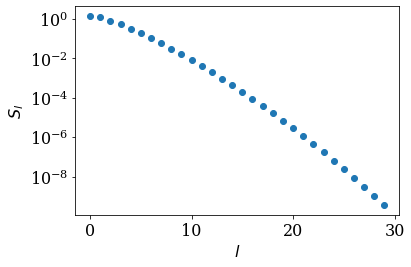

In [4]:
plt.semilogy(basis.s, marker='o', ls='')
plt.xlabel(r'$l$')
plt.ylabel(r'$S_l$')
plt.tight_layout()
plt.savefig('ir_basis_svals.pdf', transparent=True)

## $U_l(\tau)$ and $V_l(\omega)$

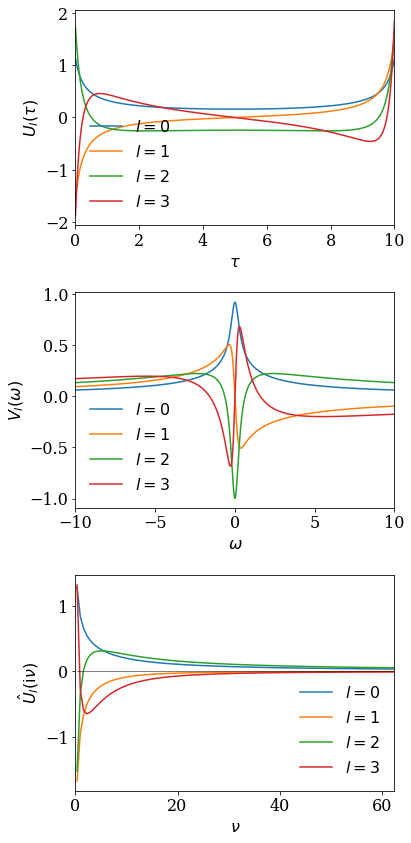

In [5]:
fig = plt.figure(figsize=(6,12))
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)
axes = [ax1, ax2, ax3]

taus = np.linspace(0, beta, 1000)
omegas = np.linspace(-wmax, wmax, 1000)

beta = 10
nmax = 100

v = 2*np.arange(nmax)+1
iv = 1J * (2*np.arange(nmax)+1) * np.pi/beta

uhat_val = basis.uhat(v)
for l in range(4):
    ax1.plot(taus, basis.u[l](taus), label=f'$l={l}$')
    ax2.plot(omegas, basis.v[l](omegas), label=f'$l={l}$')
    y = uhat_val[l,:].imag if l%2 == 0 else uhat_val[l,:].real
    ax3.plot(iv.imag, y, label=f'$l={l}$')

ax1.set_xlabel(r'$\tau$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$U_l(\tau)$')
ax2.set_ylabel(r'$V_l(\omega)$')
ax1.set_xlim([0,beta])
ax2.set_xlim([-wmax, wmax])

ax3.plot(iv.imag, np.zeros_like(iv.imag), ls='-', lw=0.5, color='k')

ax3.set_xlabel(r'$\nu$')
ax3.set_ylabel(r'$\hat{U}_l(\mathrm{i}\nu)$')
ax3.set_xlim([0, iv.imag.max()])

for ax in axes:
    ax.legend(loc='best', frameon=False)

plt.tight_layout()
plt.savefig('ir_basis_functions.pdf', transparent=True)

In [6]:
# Check orthogonality condition
for i in range(basis.size):
    for j in range(i, basis.size):
        print(i, j, basis.u[i].overlap(basis.u[j]))

0 0 [1.]
0 1 [6.44422666e-17]
0 2 [2.47021912e-16]
0 3 [-1.66641874e-16]
0 4 [-2.12557836e-16]
0 5 [-2.29715335e-17]
0 6 [-5.35595873e-17]
0 7 [1.57209315e-18]
0 8 [2.46655994e-17]
0 9 [-4.00070602e-17]
0 10 [-3.97360096e-17]
0 11 [-4.93176463e-17]
0 12 [-6.62447527e-17]
0 13 [-3.33392168e-18]
0 14 [-4.9385409e-17]
0 15 [-6.5865282e-18]
0 16 [-3.12250226e-17]
0 17 [-1.48535698e-17]
0 18 [-6.96599896e-18]
0 19 [-1.85127521e-17]
0 20 [-6.8873943e-17]
0 21 [1.74014449e-17]
0 22 [-3.96004844e-17]
0 23 [-2.67255836e-17]
0 24 [-6.91178885e-18]
0 25 [1.76724954e-17]
0 26 [2.78911009e-17]
0 27 [-1.35254221e-17]
0 28 [-6.37239827e-17]
0 29 [-8.08001669e-17]
1 1 [1.]
1 2 [1.73580768e-16]
1 3 [3.88307008e-16]
1 4 [-5.27193306e-17]
1 5 [1.02728156e-17]
1 6 [-4.13081028e-17]
1 7 [6.49166051e-17]
1 8 [-1.65611882e-17]
1 9 [-4.740674e-17]
1 10 [5.42101086e-18]
1 11 [-2.75387352e-17]
1 12 [3.03576608e-18]
1 13 [9.81202966e-18]
1 14 [-3.86789125e-17]
1 15 [-6.26397805e-17]
1 16 [-3.78928659e-17]
1 17 [